In [1]:
# CIND820 Big Data Analytics Project 
# Machine learning (ML) techniques to predict the price of used cars 
#Predictive analytics on Kijiji dataset

# Student Name: Yoseph Tiruneh, Abdi
# Student Number: 501147225




In [2]:
# Package/Library

In [3]:
import csv
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import *
%matplotlib inline

import glob
from scipy import stats
from scipy.stats import norm
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
#importing  Sklear methods
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

from sklearn import metrics 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error as rmse

from sklearn.compose import make_column_transformer


In [4]:
## Data collection and preprocessing 

In [5]:
#sns.set_style('darkgrid')
#matplotlib.rcParams['font.size']=8
#matplotlib.rcParams['figure.figsize']=(10,4)
#matplotlib.rcParams['figure.facecolor']='#00000000'

In [6]:
import pandas as pd
CarD=pd.read_csv("C:/Users/tirut/OneDrive/Documents/Personal/Ryarson Unversity/CIND820 Project/Final Theme/AdData.csv") 
CarD.head()


,AdID,city,latitude,longitude,mapAddress,title,price,saleby,make,model,...,Date,visit,No of door,No of seats,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
0,1623070279,Burnaby/New Westminster,NaN,NaN,NaN,Suzuki Jimny 2006,14999,owner,Suzuki,other,...,"06/27/2022, 20:16:56",NaN,3,4,1.0,NaN,NaN,NaN,NaN,NaN
1,1623097429,Delta/Surrey/Langley,NaN,NaN,NaN,Mustang cobra 99,26000,owner,Ford,mustang,...,"06/28/2022, 03:02:22",2026.0,2,4,1.0,NaN,NaN,NaN,NaN,NaN
2,1595531267,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Nissan Frontier SE 4X4 - Local BC | No Ac...,13995,owner,Nissan,frontier,...,"06/28/2022, 22:53:29",795.0,4,5,2.0,NaN,NaN,NaN,1.0,NaN
3,1623215000,Delta/Surrey/Langley,NaN,NaN,NaN,1985 Chevy 1500,3300,owner,Chevrolet,ck_pickup_1500,...,"06/29/2022, 10:30:00",1020.0,4,5,2.0,NaN,NaN,NaN,NaN,NaN
4,1623286366,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Volkswagen Jetta TDI,2700,owner,volkswagen,jetta,...,"06/29/2022, 14:28:28",1396.0,4,5,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Droping  attributes not in used for the study 

CarD.drop({'AdID','latitude',"longitude", "mapAddress","Date","VIN","title", "model", "Drivetrain", "Trim","parking assist","push button start","alloy wheels"}, axis=1, inplace=True)


In [8]:
CarD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51343 entries, 0 to 51342
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          51343 non-null  object 
 1   price         51343 non-null  int64  
 2   saleby        51343 non-null  object 
 3   make          51343 non-null  object 
 4   year          51343 non-null  int64  
 5   condition     51343 non-null  object 
 6   Kilometers    51343 non-null  int64  
 7   body          51343 non-null  object 
 8   fueltype      47553 non-null  object 
 9   color         48835 non-null  object 
 10  visit         50541 non-null  float64
 11  No of door    34665 non-null  object 
 12  No of seats   31829 non-null  object 
 13  Transmission  47339 non-null  float64
 14  sunroof       11710 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 5.9+ MB


In [9]:
#Change the name of some attirbutes to simple for compuation purpose 

CarD.rename(columns = {'No of seats':'seats'}, inplace = True)
CarD.rename(columns = {'No of door':'doors'}, inplace = True)

In [10]:
# Change Data types of the seats and doord 

CarD['seats']=pd.to_numeric(CarD['seats'], errors='coerce')
CarD['doors']=pd.to_numeric(CarD['doors'], errors='coerce')

In [11]:
# Data Exploration analysis 

profile=ProfileReport(CarD, title="Kjiji Car sales Profile Report", html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Drop highly correlcted attributes Transmisission, Door and Color the graph is in explotory analysis in the above question

CarD.drop({"color","fueltype"}, axis=1, inplace=True)

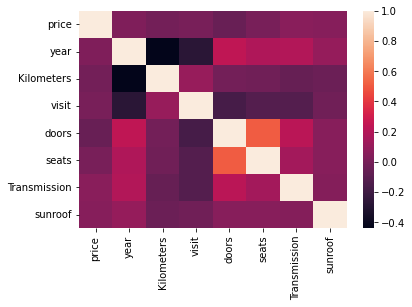

In [13]:

#Checking the correlation after droped some attributes 

dataplot=sns.heatmap(CarD.corr())

plt.show()

In [14]:
CarD.describe().T

,count,mean,std,min,25%,50%,75%,max
price,51343.0,37198.792240,442258.881411,0.0,13570.0,29295.0,49995.0,99999999.0
year,51343.0,2015.561459,6.877405,1900.0,2013.0,2017.0,2021.0,2023.0
Kilometers,51343.0,97731.696804,140004.001034,0.0,15168.5,75947.0,150000.0,9999999.0
visit,50541.0,294.065333,858.379622,0.0,15.0,75.0,261.0,54064.0
doors,34596.0,3.808302,0.689455,2.0,4.0,4.0,4.0,6.0
seats,31646.0,5.084750,1.112004,1.0,5.0,5.0,5.0,44.0
Transmission,47339.0,1.929994,0.295730,0.0,2.0,2.0,2.0,3.0
sunroof,11710.0,0.991119,0.093825,0.0,1.0,1.0,1.0,1.0


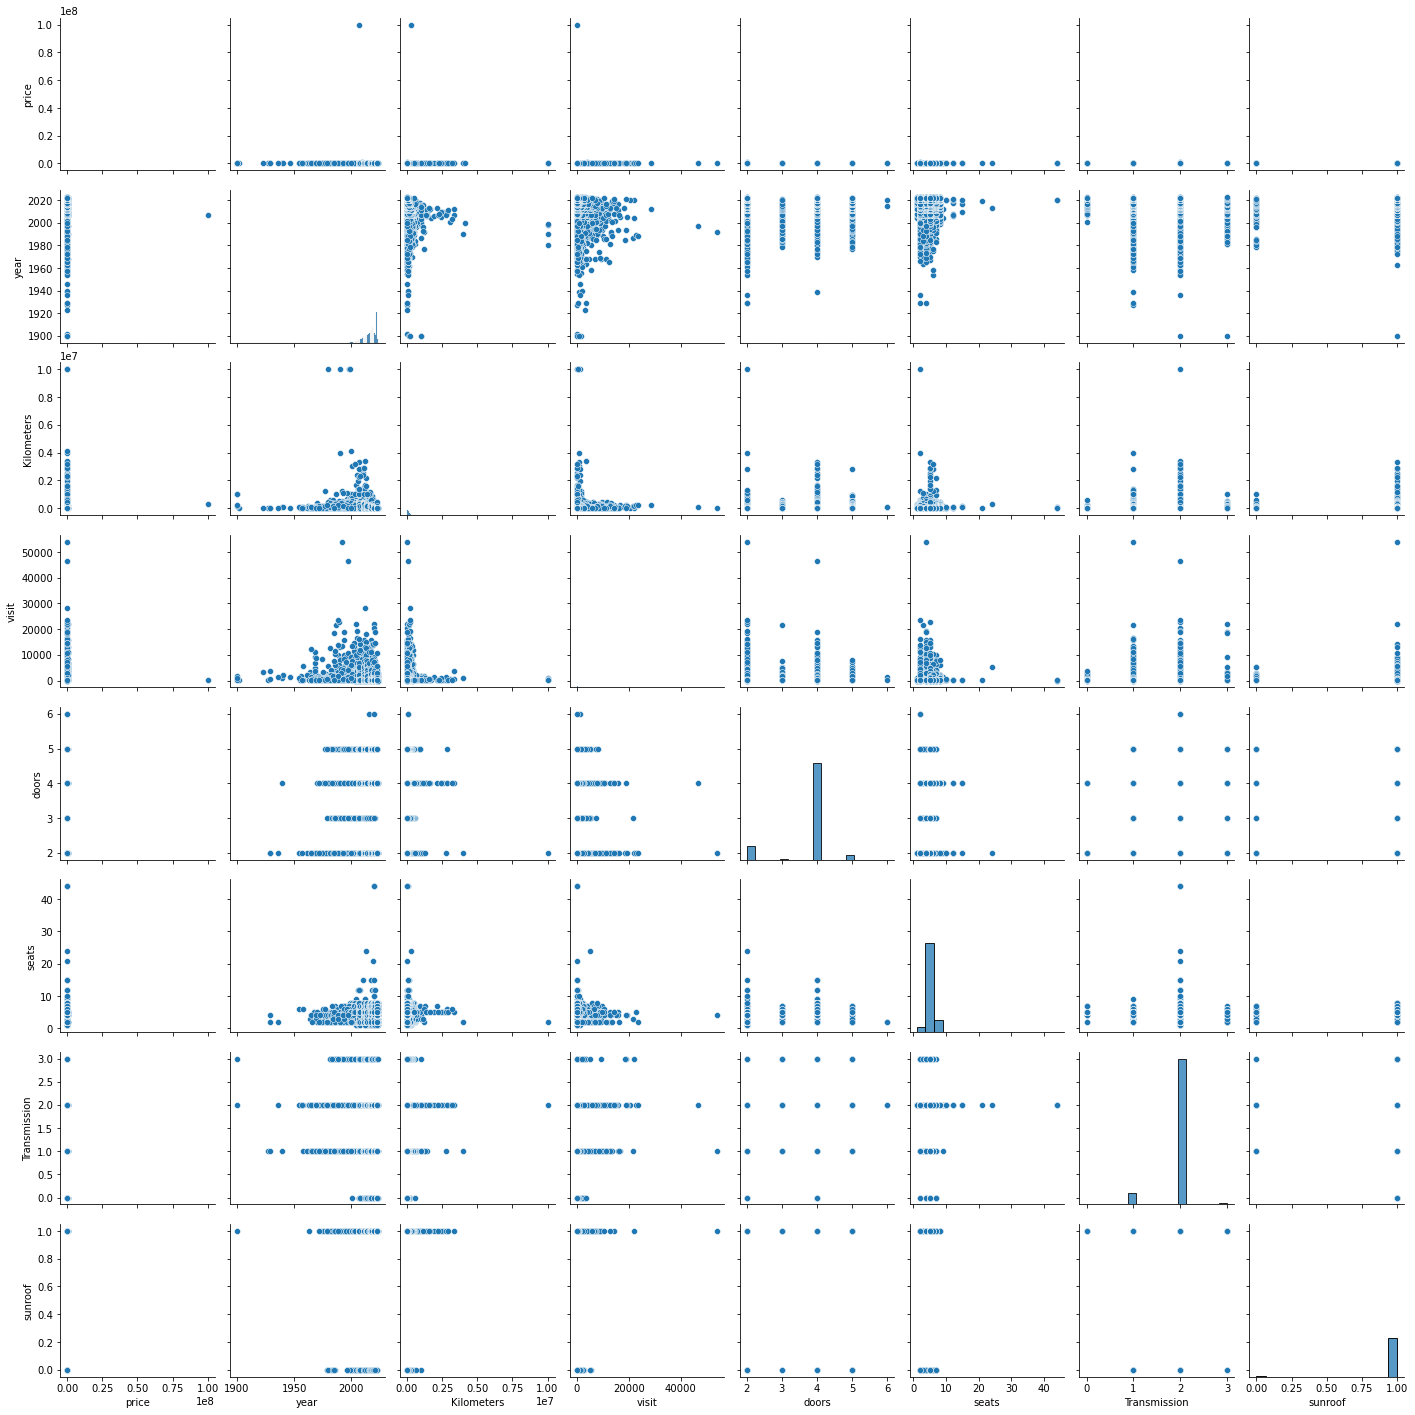

In [15]:
# To check the  correlation with pairplot of the numerical attributes 

sns.pairplot(CarD, vars = ["price", "year", "Kilometers", "visit","doors",'seats',"Transmission","sunroof" ], dropna = True)

In [16]:
#checking the missing values 

CarD.isnull().sum()

city                0
price               0
saleby              0
make                0
year                0
condition           0
Kilometers          0
body                0
visit             802
doors           16747
seats           19697
Transmission     4004
sunroof         39633
dtype: int64

In [17]:
#Filling the missing values in numeric columns

from sklearn.impute import SimpleImputer
null_col =['visit','doors','seats','Transmission','sunroof']

imputer = SimpleImputer(strategy='mean') 
CarD[null_col] = imputer.fit_transform(CarD[null_col])

In [18]:
CarD=CarD.convert_dtypes()

In [19]:
CarD.shape

(51343, 13)

In [20]:
# No missing data
CarD.isnull().sum()

city            0
price           0
saleby          0
make            0
year            0
condition       0
Kilometers      0
body            0
visit           0
doors           0
seats           0
Transmission    0
sunroof         0
dtype: int64

# Handling the outliers 

In [21]:
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    Ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    
    return Ls

In [22]:

index_list=[]
for attribute in ['visit', 'doors','seats','Transmission','sunroof']:
    index_list.extend(outliers(CarD, attribute))


In [23]:
# Define a funcation called "remove" which returns a cleaned dataframe without outliers

def remove(df, Ls):
    Ls=sorted(set(Ls))
    df=df.drop(Ls)
    return df

In [24]:
CarD=remove(CarD, index_list)

In [25]:
CarD.shape

(24515, 13)

<AxesSubplot:xlabel='year'>

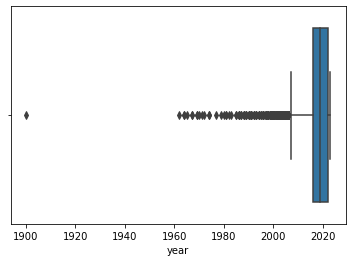

In [26]:
sns.boxplot(x=CarD["year"])



<AxesSubplot:xlabel='Kilometers'>

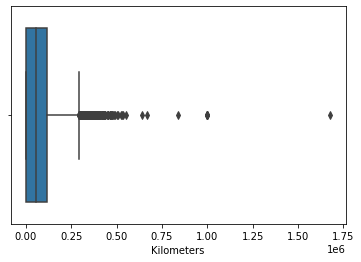

In [27]:
sns.boxplot(x=CarD["Kilometers"])



<AxesSubplot:xlabel='visit'>

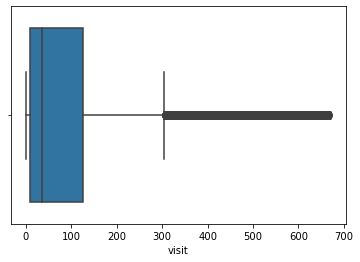

In [28]:
sns.boxplot(x=CarD["visit"])



<AxesSubplot:xlabel='seats'>

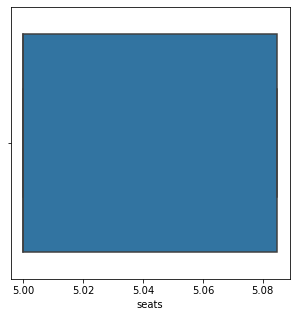

In [29]:
#praphs to show the distrubtuion of the numerical categories 
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.boxplot(x=CarD["seats"])



<AxesSubplot:xlabel='price'>

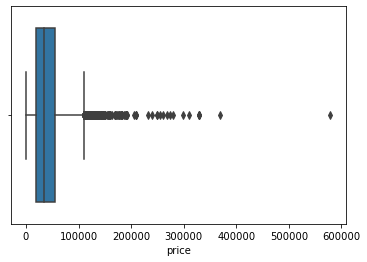

In [30]:
sns.boxplot(x=CarD["price"])

# Correlation table after removing the outliers 

In [31]:
CarD.describe().T

,count,mean,std,min,25%,50%,75%,max
price,24515.0,38135.250337,26888.844956,0.000000,18994.500000,33587.000000,55265.000000,5.788000e+05
year,24515.0,2017.729594,4.843991,1900.000000,2016.000000,2019.000000,2022.000000,2.023000e+03
Kilometers,24515.0,73945.655395,79810.669648,0.000000,90.000000,54601.000000,118000.000000,1.677988e+06
visit,24515.0,96.087717,135.357136,0.000000,8.000000,35.000000,126.000000,6.700000e+02
doors,24515.0,3.920435,0.094458,3.808302,3.808302,4.000000,4.000000,4.000000e+00
seats,24515.0,5.039922,0.042305,5.000000,5.000000,5.000000,5.084750,5.084750e+00
Transmission,24515.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00
sunroof,24515.0,0.991119,0.000000,0.991119,0.991119,0.991119,0.991119,9.911187e-01


# Spliting the data set  to train, test and validation

In [32]:
#Spliting the dataset to training, validation and testing 

train_val_df,test_df=train_test_split(CarD, test_size=0.20)
train_df, val_df=train_test_split(CarD,test_size=0.20)

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (19612, 13)
val_df.shape: (4903, 13)
test_df.shape: (4903, 13)


In [33]:
#identifying the target column

input_cols=list(train_df[[ 'city','saleby', 'make',  'year', 'condition', 'Kilometers','body',  'visit', 'seats','Transmission','sunroof']])
print(input_cols)

['city', 'saleby', 'make', 'year', 'condition', 'Kilometers', 'body', 'visit', 'seats', 'Transmission', 'sunroof']


In [34]:
# print target column
target_col=list(train_df[['price']])
print(target_col)

['price']


In [35]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [36]:
val_inputs =val_df[input_cols]
val_targets = val_df[target_col]

In [37]:
test_inputs = test_df[input_cols]
test_targets = val_df[target_col]

In [38]:
#selecting columns with number datatypes and catagotical separatly 

numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('string').columns.tolist()


In [39]:
#Check the null values of the dataset
numeric_cols

['year', 'Kilometers', 'visit', 'seats', 'Transmission', 'sunroof']

In [40]:
categorical_cols

['city', 'saleby', 'make', 'condition', 'body']

In [41]:
CarD[numeric_cols].nunique()

year               55
Kilometers      14082
visit             669
seats               2
Transmission        1
sunroof             1
dtype: int64

In [42]:
CarD["saleby"].value_counts()

dealer    22242
owner      2273
Name: saleby, dtype: Int64

In [43]:
CarD["make"].value_counts()


Ford                       3319
Ram                        2934
Chevrolet                  1808
Toyota                     1749
Jeep                       1694
Hyundai                    1437
Nissan                     1359
Gmc                        1204
Honda                       867
Bmw                         864
Mercedes Benz               805
Kia                         744
Dodge                       712
volkswagen                  565
Lexus                       520
Mazda                       519
Cadillac                    387
Audi                        370
Subaru                      279
Infiniti                    243
Mitsubishi                  236
Volvo                       231
Tesla                       221
Chrysler                    205
Land Rover                  191
Lincoln                     154
Acura                       149
Buick                       147
other                       144
Mercedes Amg                 92
Porsche                      80
alfarome

In [44]:
CarD["condition"].value_counts()     


used              17947
new                6530
lease_takeover       16
damaged              15
salvage               7
Name: condition, dtype: Int64

In [45]:
  CarD["body"].value_counts()        


suv_crossover    10440
pickup_truck      5414
sedan             4778
other             1965
hatchback          754
minivan_van        344
wagon              309
coupe_2_door       257
convertible        254
Name: body, dtype: Int64

# Scalling numerical features to a (0,1) range

In [46]:
# MinMaxScaler from sklear.preprocessing to scale values to the(0,1) range.

scaler=MinMaxScaler()

In [47]:
#Fiting the scaler to the data, i.e compute the range of values for each numeric coumn

scaler.fit(CarD[numeric_cols])

MinMaxScaler()

In [48]:

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [49]:
#cheking the descriptve value of train_inputs 

train_inputs.describe()



,year,Kilometers,visit,seats,Transmission,sunroof
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.0
mean,0.957158,0.043944,0.142509,0.471956,0.0,0.0
std,0.039343,0.046636,0.201635,0.499226,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.943089,0.000054,0.011940,0.000000,0.0,0.0
50%,0.967480,0.032554,0.052239,0.000000,0.0,0.0
75%,0.991870,0.070446,0.186567,1.000000,0.0,0.0
max,1.000000,0.595952,1.000000,1.000000,0.0,0.0


# Standardization

In [50]:
scale=StandardScaler()

In [51]:
scaler.fit_transform(CarD[numeric_cols])

array([[8.04878049e-01, 1.19190364e-01, 5.50746269e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.13008130e-01, 2.12158847e-01, 4.38903482e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.61788618e-01, 9.53522910e-02, 2.28358209e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [9.91869919e-01, 1.37068918e-05, 1.04477612e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.91869919e-01, 1.43028436e-05, 4.47761194e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.91869919e-01, 5.95951818e-05, 1.64179104e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

# Encoding Categorical Variables 

In [52]:
#OnehotEncoding invoves adding a new binary (0/1) column for each uniue category of a categorical column

x=CarD[categorical_cols].nunique()
print(x)

city         12
saleby        2
make         54
condition     5
body          9
dtype: int64


In [53]:
CarD[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24515 entries, 19 to 51342
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       24515 non-null  string
 1   saleby     24515 non-null  string
 2   make       24515 non-null  string
 3   condition  24515 non-null  string
 4   body       24515 non-null  string
dtypes: string(5)
memory usage: 1.1 MB


In [54]:
# Using Onehotencoding using the OneHotEncoder class from sklearn.preprocessing 

encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [55]:
# We can generate column names for each individual category suing get_feature_names.
OneHotEncoder(handle_unknown='ignore')


OneHotEncoder(handle_unknown='ignore')

In [56]:
encoder.fit(CarD[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [57]:
encoder.categories_

[array(['Burnaby/New Westminster', 'Calgary', 'City of Toronto',
        'Delta/Surrey/Langley', 'Downtown-West End', 'Gatineau',
        'North Shore', 'Ottawa', 'Richmond', 'Tricities/Pitt/Maple', 'UBC',
        'Vancouver'], dtype=object),
 array(['dealer', 'owner'], dtype=object),
 array(['Acura', 'Amc', 'Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'Fiat',
        'Ford', 'Genesis', 'Gmc', 'Honda', 'Hummer', 'Hyundai', 'Infiniti',
        'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln',
        'Maserati', 'Mazda', 'Mercedes Amg', 'Mercedes Benz', 'Mercury',
        'Mini', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche',
        'Ram', 'Rolls Royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru',
        'Suzuki', 'Tesla', 'Toyota', 'Volvo', 'alfaromeo',
        'international_harvester', 'lamborghini', 'other', 'volkswagen'],
       dtype=object),
 array(['damaged', 'lease_takeover

In [58]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['city_Burnaby/New Westminster', 'city_Calgary', 'city_City of Toronto', 'city_Delta/Surrey/Langley', 'city_Downtown-West End', 'city_Gatineau', 'city_North Shore', 'city_Ottawa', 'city_Richmond', 'city_Tricities/Pitt/Maple', 'city_UBC', 'city_Vancouver', 'saleby_dealer', 'saleby_owner', 'make_Acura', 'make_Amc', 'make_Aston Martin', 'make_Audi', 'make_Bentley', 'make_Bmw', 'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Dodge', 'make_Ferrari', 'make_Fiat', 'make_Ford', 'make_Genesis', 'make_Gmc', 'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_Infiniti', 'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Maserati', 'make_Mazda', 'make_Mercedes Amg', 'make_Mercedes Benz', 'make_Mercury', 'make_Mini', 'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile', 'make_Pontiac', 'make_Porsche', 'make_Ram', 'make_Rolls Royce', 'make_Saab', 'make_Saturn', 'make_Scion', 'make_Smart', 'make_Subaru', 'make_Suzuki', 'm

In [59]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols].fillna("Unknown"))
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols].fillna("Unknown"))
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols].fillna("Unknown"))

C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [60]:
## Train_inputs = X_train, train_targets = Y_train  and test_inputs = X_test ,  and test_target = Y_test )
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (19612, 93)
train_targets: (19612, 1)
val_inputs: (4903, 93)
val_targets: (4903, 1)
test_inputs: (4903, 93)
test_targets: (4903, 1)


In [61]:
!pip install pyarrow --quiet

In [62]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [63]:
pd.DataFrame(train_targets).to_parquet('train_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_inputs.parquet')
pd.DataFrame(test_targets).to_parquet('test_inputs.parquet')                                      

# Linear regression model 

In [66]:
X_train=train_inputs[numeric_cols + encoded_cols]
X_val=val_inputs[numeric_cols + encoded_cols]
X_test=test_inputs[numeric_cols +encoded_cols]


In [145]:
#Modelling/Logistic Regression
# Linear regression is a commonly used techniques for solving  binary classification problems

regr=linear_model.LinearRegression()

In [146]:
regr.fit(X_train, train_targets)

LinearRegression()

In [149]:
# predication on training data
predictions=regr.predict(X_train)

In [154]:
# R squared error
error_score=metrics.r2_score(train_targets, predictions)


In [153]:
print("R squared Error:", error_score)

R squared Error: 0.5690101302217843


In [115]:
predictions

array([[21248.],
       [55552.],
       [17792.],
       ...,
       [38400.],
       [55552.],
       [19200.]])

In [105]:
m=regr.coef_
print(m)

[[ 1.90370362e+05 -1.66893419e+05  8.20504154e+03  4.99016077e+02
   1.52831632e+17  6.03740081e+16  1.03589290e+16  1.03589290e+16
   1.03589290e+16  1.03589290e+16  1.03589290e+16  1.03589290e+16
   1.03589290e+16  1.03589290e+16  1.03589290e+16  1.03589290e+16
   1.03589290e+16  1.03589290e+16 -8.80190725e+17 -8.80190725e+17
  -2.43452674e+16 -2.43452674e+16  1.30333900e+17 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -6.73624928e+15
  -2.43452674e+16 -2.43452674e+16 -2.43452674e+16 -2.43452674e+16
  -2.43452

In [163]:
#Linear model for test data
predictions2=regr.predict(X_test)
error_score=metrics.r2_score(test_targets, predictions2)

In [164]:
print("R squared Error:", error_score)

R squared Error: -0.6162613237306611


# Decision Tree 

In [106]:
dt_clf=DecisionTreeRegressor(max_depth = 5)

dt_clf.fit(X_train, train_targets)


DecisionTreeRegressor(max_depth=5)

In [112]:
train_targets_ped=dt_clf.predict(X_train)
dt_clf.score(X_test, test_targets)

-0.5396824839237517

# Random Forest Regressor 

In [84]:
rf_clf=RandomForestRegressor(n_estimators = 100, random_state = 42)


In [135]:
rf_clf.fit(X_train, train_targets)


C:\Users\tirut\AppData\Local\Temp/ipykernel_28128/1041490374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, train_targets)


RandomForestRegressor(random_state=42)

In [136]:
rf_clf.score(X_test, test_targets)

-0.8203918288809622